In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import multiprocessing

In [2]:
df = pd.read_csv("/home/bh_parijat/data/master_mapped_data.csv")

In [3]:
print(df.shape)

(4791859, 22)


In [4]:
print(df.columns)

Index(['index', 'ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD',
       'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'org_index', 'zipcode', 'city'],
      dtype='object')


In [5]:
df.head()

,index,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,org_index,zipcode,city
0,0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,...,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638,0.0,11426,Bellerose
1,1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,...,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241,1.0,11105,Astoria
2,2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,...,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572,2.0,11207,Brooklyn
3,3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,...,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074,3.0,10019,New York
4,4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,...,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811,4.0,10036,New York


In [6]:
df = df.drop(columns=['index','org_index'])

In [7]:
crimes_by_age = df.AGE_GROUP.value_counts().sort_values(ascending = False)[:5]

In [8]:
crimes_by_age[:]

25-44    2199242
18-24    1272256
45-64     879628
<18       401573
65+        38965
Name: AGE_GROUP, dtype: int64

Text(0, 0.5, 'Number of Arrests')

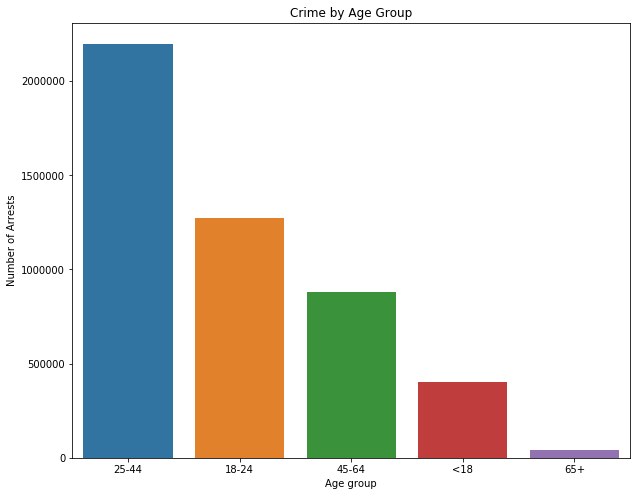

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=crimes_by_age.index, y = crimes_by_age )
plt.title("Crime by Age Group")
plt.xlabel("Age group")
plt.ylabel("Number of Arrests")

In [10]:
crimes_by_city = df.city.value_counts().sort_values(ascending = False)[:10]

Text(0, 0.5, 'Number of Arrests')

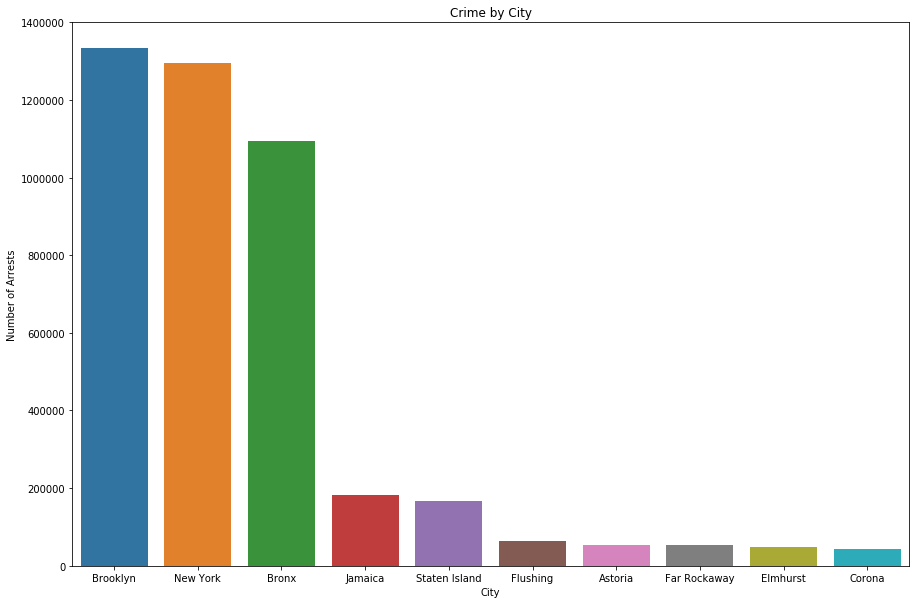

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x=crimes_by_city.index, y = crimes_by_city )
plt.title("Crime by City")
plt.xlabel("City")
plt.ylabel("Number of Arrests")

In [35]:
df['Year'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[-1]))

In [36]:
df['Month'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[0]))

In [37]:
df['Day'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[1]))

In [38]:
crimes_by_year = df.Year.value_counts()

Text(0, 0.5, 'Number of Arrests')

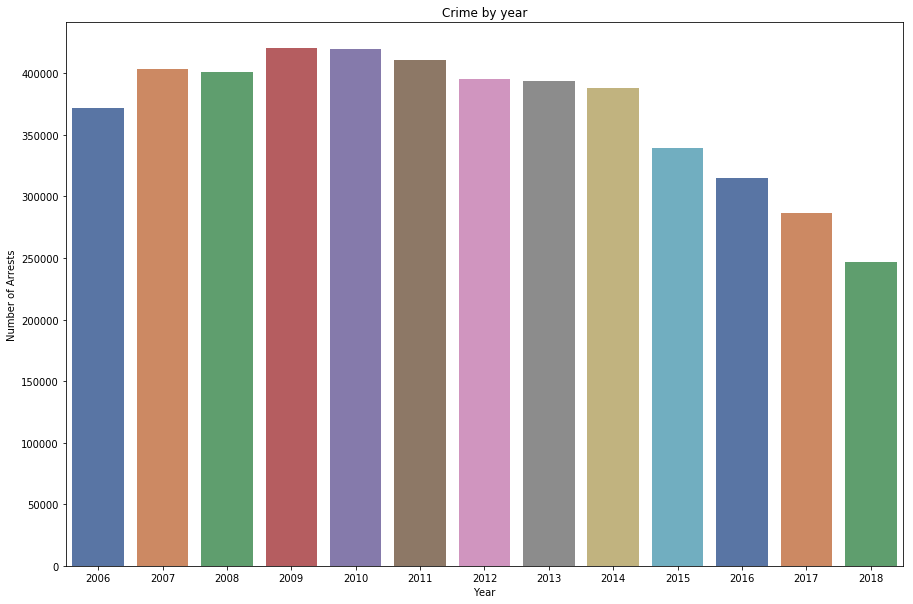

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(x=crimes_by_year.index, y = crimes_by_year,palette='deep' )
plt.title("Crime by year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")

In [41]:
df[df.Year == 2018]['ARREST_DATE'].max()

'12/31/2018'

In [42]:
df.Year.max(), df.Year.min()

(2018, 2006)

In [43]:
arrests_by_month = df.Month.value_counts()

Text(0, 0.5, 'Number of Arrests')

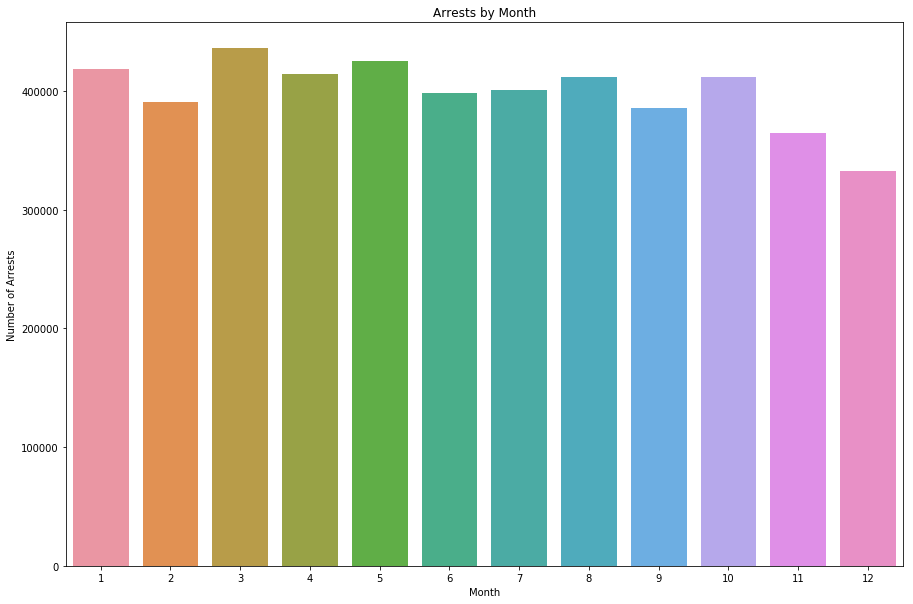

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(x=arrests_by_month.index, y = arrests_by_month )
plt.title("Arrests by Month")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

In [45]:
arrests_by_month = arrests_by_month/ arrests_by_month.min()

Text(0, 0.5, 'Number of Arrests')

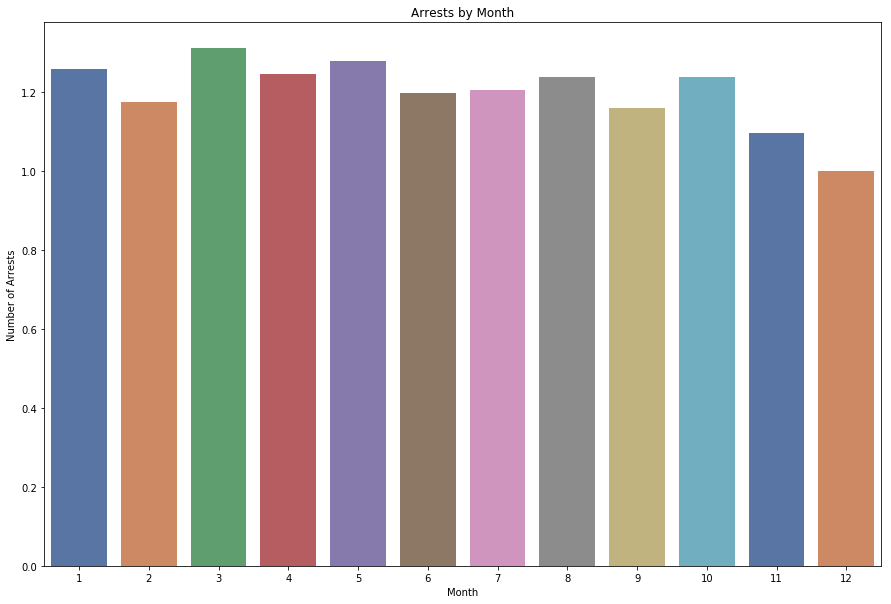

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x=arrests_by_month.index, y = arrests_by_month,palette='deep')
plt.title("Arrests by Month")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

In [49]:
df[(df.Year==2006) & (df.Month == 1)].Day.max()

31

In [50]:
df[(df.Year==2006) & (df.Month == 1)].Day.min()

1

In [68]:
date = pd.to_datetime('01-01-2006')

In [69]:
date

Timestamp('2006-01-01 00:00:00')

In [58]:
print(pd.to_datetime(date.day + 1))

1970-01-01 00:00:00.000000032


In [61]:
pd.timedelta_range(start='1-1-2006',end='3-02-2006',freq='1d')

ValueError: only leading negative signs are allowed

In [63]:
date+pd.to_timedelta(1,unit='d')

Timestamp('2006-02-01 00:00:00')

In [73]:
start = date

day, month, year = None, None, None

map_days = {}
while day!=31 or month!=12 or year!=2018:
    
    next_date = date + pd.to_timedelta(1.0,unit='d')
    
    date = next_date 
    
    day = date.day
    
    month = date.month
    
    year = date.year
    
    #print(day,month,year)
    map_days[month] = map_days.get(month,0) + 1
    
    

OutOfBoundsDatetime: 9223372800000000000